# Challenge técnico Xepelin

Consigna: estamos desarrollando un nuevo producto y tu objetivo es analizar los datos transaccionales disponible y generar un
modelo que permita predecir cuánto dinero se pagará a través de este producto y cuanto se financiará . Crea el modelo que consideres apropiado para estimar el dinero que se moverá en Xepelin
durante junio 2022. 

In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [643]:
data = pd.read_csv('data_test.csv')

In [644]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20 00:00:00,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19 00:00:00,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13 00:00:00,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID


## Limpieza de datos

In [645]:
data['paidAt'] = pd.to_datetime(data['paidAt']) #separamos la columna datetime en date y time
data['date'] = data['paidAt'].dt.strftime('%m-%Y')
data['time'] = data['paidAt'].dt.strftime('%H:%M')

In [646]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,04-2022,00:00
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,11-2021,00:00
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,10-2021,00:00
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,11-2021,00:00
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,03-2022,00:00


In [647]:
data['date'].isna().value_counts()

False    892
True     308
Name: date, dtype: int64

In [648]:
data['time'].value_counts() #vemos que el 70 porciento de nuestro horario es 00:00:00 por ende no vamos a utilizar esta columna en nuestro modelo

00:00    840
16:13      3
15:57      3
13:56      2
20:08      2
02:16      2
22:47      1
22:50      1
15:15      1
15:19      1
16:06      1
18:31      1
23:03      1
21:34      1
21:51      1
23:04      1
22:37      1
16:05      1
15:21      1
20:14      1
22:57      1
20:49      1
21:02      1
14:19      1
16:54      1
15:56      1
15:31      1
16:28      1
14:13      1
00:15      1
20:19      1
20:34      1
22:03      1
14:47      1
18:27      1
23:27      1
18:03      1
17:07      1
17:08      1
18:05      1
14:23      1
15:53      1
18:42      1
18:09      1
18:41      1
18:29      1
Name: time, dtype: int64

In [649]:
data['time'].isna().value_counts() #vemos que la columna de time tiene en muchos datos en nan pero como no la utilizaremos no los vamos a reemplazar

False    892
True     308
Name: time, dtype: int64

## EDA

In [650]:
data['porcentaje'] = (data['amountfinancedByXepelin']) *100 / data['amount'].round(0)
#creamos la columna de porcentaje para conocer cuanto porcentaje del amount es financiado por xepelin y graficar variables

In [651]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,04-2022,00:00,0.000000
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,11-2021,00:00,9.730134
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,10-2021,00:00,37.600164
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,11-2021,00:00,43.382966
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,03-2022,00:00,100.000000


In [652]:
data['porcentaje'].dtype

dtype('float64')

In [653]:
## Graficos 

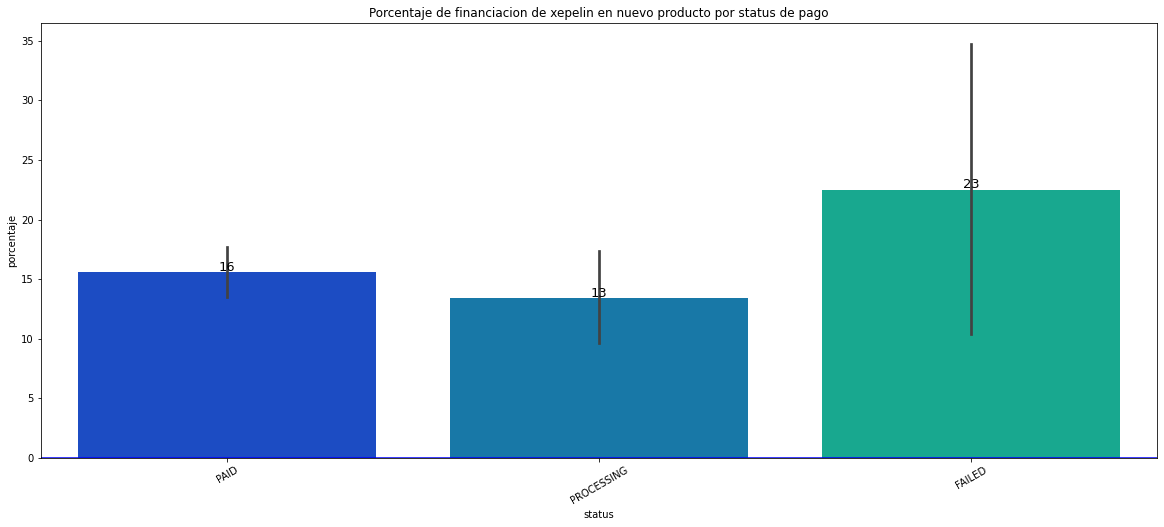

In [654]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="status",
            y="porcentaje",
            data= data,palette="winter", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en nuevo producto por status de pago')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.axhline(data['porcentaje'].median(),color='b')
plt.show()

In [655]:
paid = data.loc[data['status'] == 'PAID'] 

In [656]:
paid['porcentaje'].median()

0.0

In [657]:
paid['porcentaje'].std()

33.48255021085648

In [658]:
processing = data.loc[data['status'] == 'PROCESSING'] 

In [659]:
processing['porcentaje'].median()

0.0

In [660]:
processing['porcentaje'].std()

31.875336909824

In [661]:
paid = data.loc[data['status'] == 'PAID'] 

In [662]:
paid['porcentaje'].median()

0.0

In [663]:
paid['porcentaje'].std()

33.48255021085648

In [664]:
data['porcentaje'].value_counts()

0.000000      914
100.000000     26
100.001845      6
100.000168      4
100.000608      3
             ... 
100.000292      1
99.999643       1
30.853223       1
0.563283        1
99.999939       1
Name: porcentaje, Length: 243, dtype: int64

In [665]:
full = data.loc[data['porcentaje'] == 100.000000]

In [666]:
full

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
4,87,14,18660733,2022-03-23 00:00:00,20532.0,20532.0,PAID,03-2022,00:00,100.0
24,55,65,18660753,2022-01-10 00:00:00,6380.0,6380.0,PAID,01-2022,00:00,100.0
27,21,71,18660756,2022-01-10 00:00:00,6000.0,6000.0,PAID,01-2022,00:00,100.0
49,145,89,18660778,2021-11-14 00:00:00,6380.0,6380.0,PAID,11-2021,00:00,100.0
56,170,42,18660785,2022-01-19 00:00:00,3161.0,3161.0,PAID,01-2022,00:00,100.0
145,104,14,18660874,2022-03-13 00:00:00,284548.0,284548.0,PAID,03-2022,00:00,100.0
216,67,38,18660945,2022-04-23 00:00:00,158108.0,158108.0,PAID,04-2022,00:00,100.0
229,103,14,18660958,2022-04-23 00:00:00,15660.0,15660.0,PAID,04-2022,00:00,100.0
275,135,83,18661004,2022-02-05 00:00:00,8120.0,8120.0,PAID,02-2022,00:00,100.0
299,193,133,18661028,2022-02-05 00:00:00,7018.0,7018.0,PAID,02-2022,00:00,100.0


In [667]:
full['status'].value_counts()

PAID          20
PROCESSING     5
FAILED         1
Name: status, dtype: int64

In [668]:
cero = data.loc[data['porcentaje'] == 00.000000]

In [669]:
cero

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23,1490.46,0.0,PAID,04-2022,00:00,0.0
7,55,17,18660736,2022-04-23,1190.46,0.0,PAID,04-2022,00:00,0.0
8,126,18,18660737,2021-10-09,920.26,0.0,PAID,10-2021,00:00,0.0
9,151,19,18660738,2021-10-09,1490.46,0.0,PAID,10-2021,00:00,0.0
10,37,21,18660739,2022-03-23,990.46,0.0,PAID,03-2022,00:00,0.0
...,...,...,...,...,...,...,...,...,...,...
1195,9,16,18661924,NaT,1281.86,0.0,FAILED,NaN,NaN,0.0
1196,135,80,18661925,NaT,1147.86,0.0,FAILED,NaN,NaN,0.0
1197,61,16,18661926,NaT,1490.46,0.0,FAILED,NaN,NaN,0.0
1198,36,154,18661927,NaT,800.66,0.0,FAILED,NaN,NaN,0.0


In [670]:
cero['status'].value_counts()

PAID          671
PROCESSING    216
FAILED         27
Name: status, dtype: int64

In [671]:
data['date'] = data['date'].fillna("-1") #a los fines de graficar vamos a reemplazar los nan de esta columna por un string. no vamos a reemplazar con la fecha mas usada, ya que traeria mucha correlacion con una fecha, y debemos usar esta columna cuando entrenemos el modelo

In [672]:
last_year = data[data['date'].str.contains("2021")]

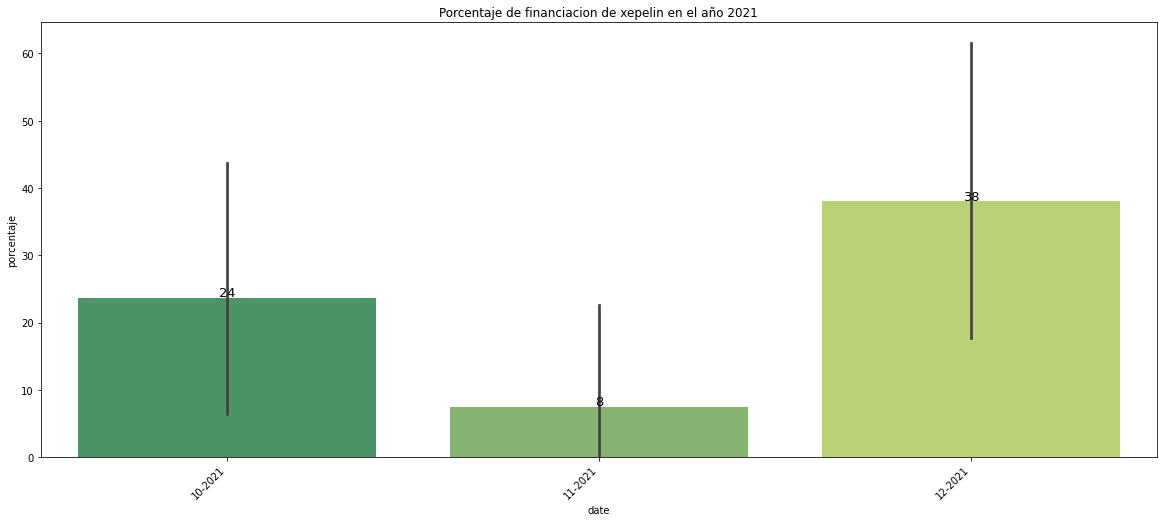

In [673]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="porcentaje",
            data= last_year, palette="summer", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en el año 2021')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
x_dates = last_year['date'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

In [674]:
this_year = data[data['date'].str.contains("2022")]

In [675]:
this_year

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID,04-2022,00:00,0.000000
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID,03-2022,00:00,100.000000
6,99,16,18660735,2022-04-23 00:00:00,6323.16,2522.42,PAID,04-2022,00:00,39.892772
7,55,17,18660736,2022-04-23 00:00:00,1190.46,0.00,PAID,04-2022,00:00,0.000000
10,37,21,18660739,2022-03-23 00:00:00,990.46,0.00,PAID,03-2022,00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
1117,163,143,18661846,2022-02-01 15:15:00,1490.26,0.00,PAID,02-2022,15:15,0.000000
1152,121,43,18661881,2022-01-22 18:29:00,1490.26,0.00,PAID,01-2022,18:29,0.000000
1163,191,118,18661892,2022-02-23 00:00:00,1147.86,0.00,PAID,02-2022,00:00,0.000000
1164,171,125,18661893,2022-02-23 00:00:00,1792.46,0.00,PAID,02-2022,00:00,0.000000


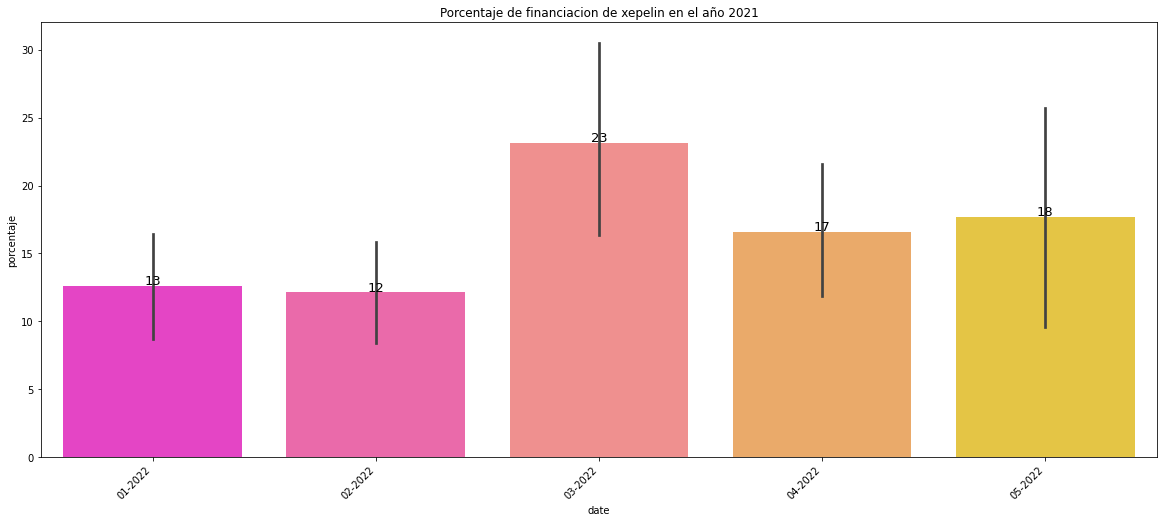

In [676]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="porcentaje",
            data= this_year, palette="spring", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en el año 2021')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
x_dates = this_year['date'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

In [677]:
df = data.groupby('date').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean),
        count_dates=('date',len)
    ).reset_index()\
    .sort_values(by='count_dates', ascending=False)

In [678]:
df

,date,amount,amount_xepp,count_dates
0,-1,19453.201688,14437.404968,308
4,04-2022,18744.980260,11367.547881,269
3,03-2022,25626.312222,10419.466578,225
2,02-2022,38801.423552,24512.089727,183
1,01-2022,68065.845981,48780.477850,107
5,05-2022,16175.186575,9790.900959,73
8,12-2021,44349.793529,34872.415882,17
7,11-2021,20642.245385,9180.962308,13
6,10-2021,7180.528000,2104.030000,5


## Estacionalidad de amout y de financiacion de xepelin 

In [679]:
df = df[~df['date'].str.startswith('-1')]


In [680]:
last = df[df['date'].str.contains("2021")]

In [681]:
this = df[df['date'].str.contains("2022")]

In [682]:
last = last.sort_values(by = 'date', ascending = True)

In [683]:
this = this.sort_values(by = 'date', ascending = True)

## amount 

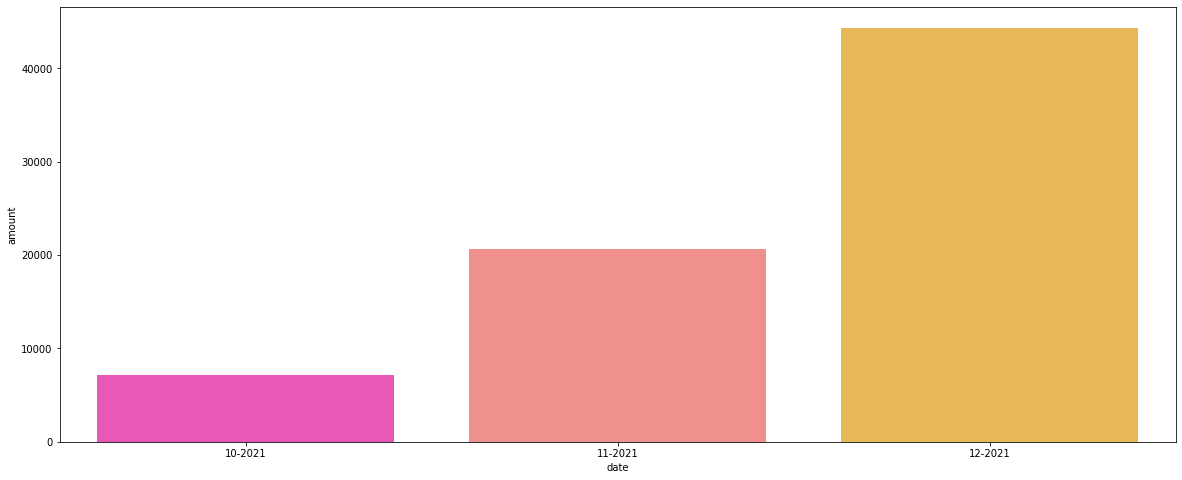

In [684]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount",
            data= last, palette="spring", ax=ax)
plt.show()

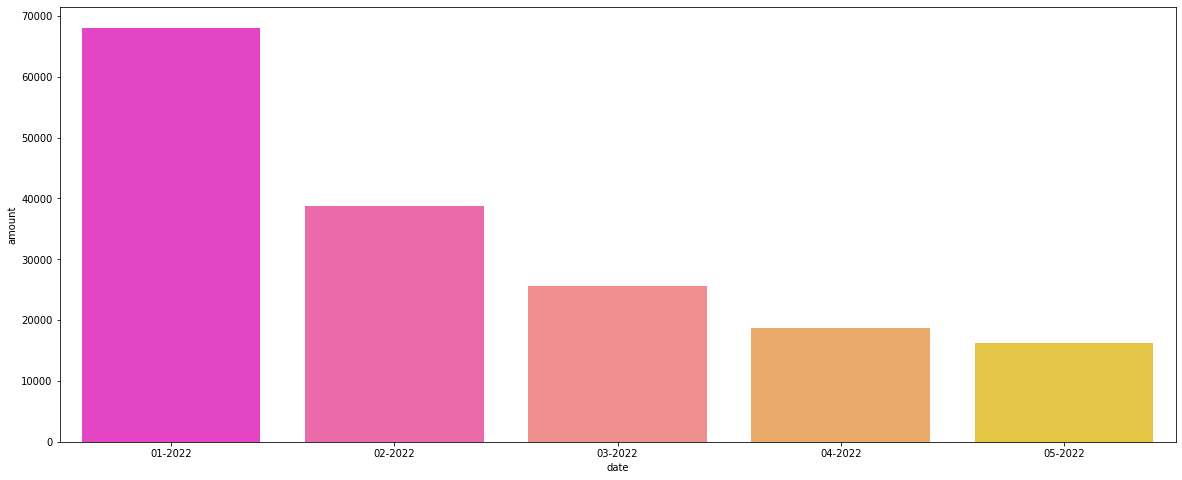

In [685]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount",
            data= this, palette="spring", ax=ax)
plt.show()

## financiado por xepelin

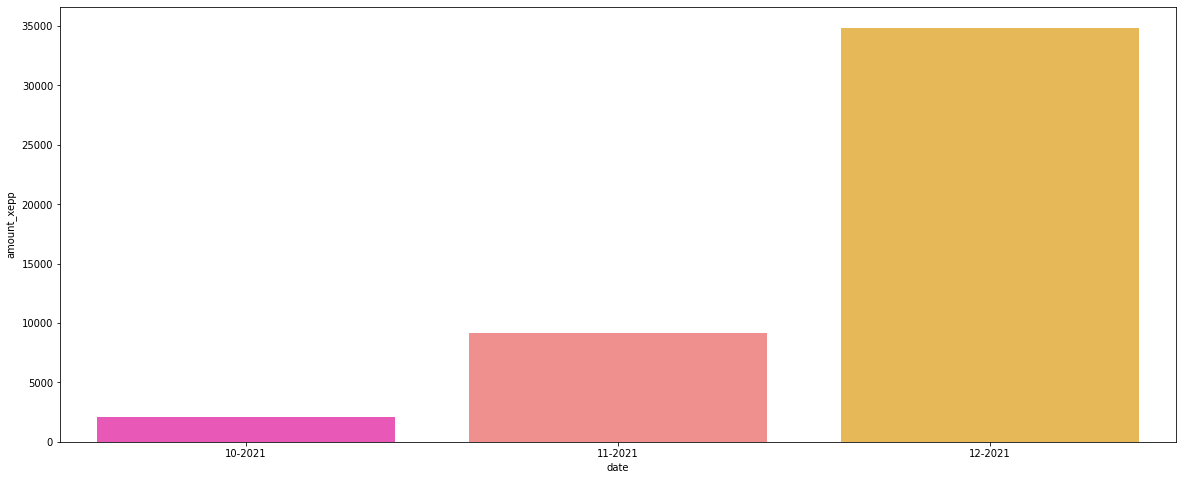

In [686]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount_xepp",
            data= last, palette="spring", ax=ax)
plt.show()

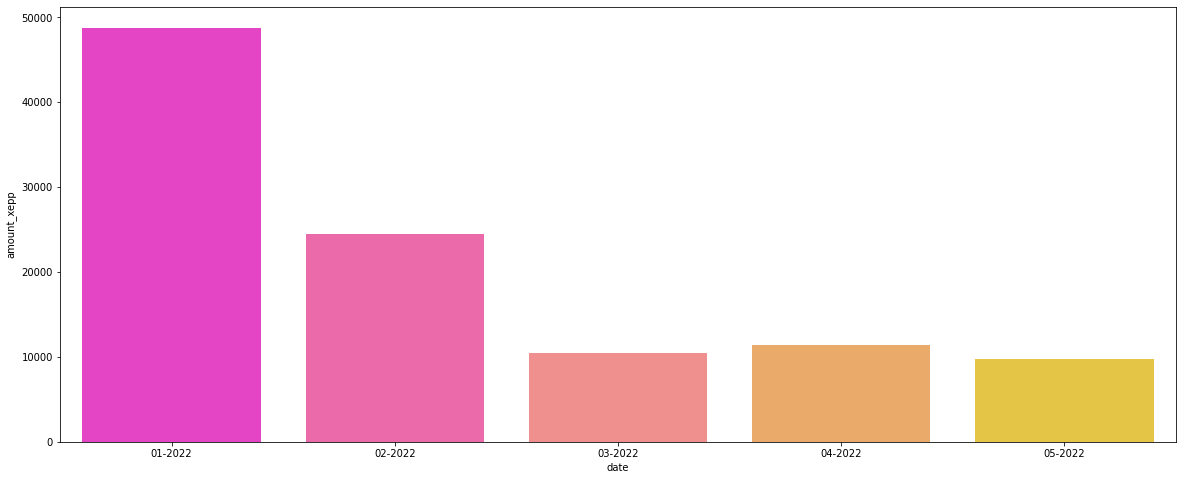

In [687]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount_xepp",
            data= this, palette="spring", ax=ax)
plt.show()

## Analisis de variables 

In [688]:
payer_s = data.groupby('PayerId')['status'].value_counts().to_frame()

In [689]:
payer_s

status
PayerId status            
1       PAID             6
        PROCESSING       2
2       PAID             3
        PROCESSING       1
3       PROCESSING       1
...                    ...
198     PAID             4
        PROCESSING       1
199     PAID             5
        PROCESSING       3
200     PAID             2

[389 rows x 1 columns]

In [690]:
payer = data.groupby('PayerId').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean)
    ).reset_index()

In [691]:
payer

,PayerId,amount,amount_xepp
0,1,2747.452500,1315.44000
1,2,3589.302500,0.00000
2,3,2766.200000,0.00000
3,4,1178.080000,0.00000
4,5,7479.515000,2075.81250
...,...,...,...
195,196,5743.965714,1962.15000
196,197,45408.488000,44477.62400
197,198,1629.878000,200.00200
198,199,3206.555000,553.59875


In [692]:
receiver_s = data.groupby('ReceiverId')['status'].value_counts().to_frame()

In [693]:
receiver_s

status
ReceiverId status            
10         PAID             8
           PROCESSING       3
           FAILED           1
11         PAID            13
           PROCESSING       5
...                       ...
153        PROCESSING       2
           FAILED           1
154        PAID             4
           FAILED           1
           PROCESSING       1

[182 rows x 1 columns]

In [694]:
receiver = data.groupby('ReceiverId').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean)
    ).reset_index()

In [695]:
receiver

,ReceiverId,amount,amount_xepp
0,10,6676.668333,901.607500
1,11,27149.696111,25330.743333
2,12,30861.940000,7975.031667
3,13,27381.316667,14972.901667
4,14,23341.711452,8421.231720
...,...,...,...
72,145,1570.483333,0.000000
73,149,15852.090000,12014.893333
74,151,19281.863333,10794.276667
75,153,15877.633333,15191.403333


In [696]:
df = data.drop(columns=['invoiceId', 'time', 'paidAt', 'porcentaje'])

In [697]:
df.head()

,PayerId,ReceiverId,amount,amountfinancedByXepelin,status,date
0,53,10,1490.46,0.00,PAID,04-2022
1,93,11,6418.28,624.48,PAID,11-2021
2,122,12,27979.20,10520.15,PAID,10-2021
3,85,13,183070.77,79421.63,PAID,11-2021
4,87,14,20532.00,20532.00,PAID,03-2022


In [698]:
df.isnull().values.any()

False

## Modelado

## Construcción de modelo de regresión

### XGBoost Extreme Gradient Boosting

In [699]:
# hacer one hot encoding o get dummys 

In [700]:
data = pd.get_dummies(df, columns = ['PayerId', 'ReceiverId', 'status', 'date'])

In [701]:
data.head()

,amount,amountfinancedByXepelin,PayerId_1,PayerId_2,PayerId_3,PayerId_4,PayerId_5,PayerId_6,PayerId_7,PayerId_8,...,status_PROCESSING,date_-1,date_01-2022,date_02-2022,date_03-2022,date_04-2022,date_05-2022,date_10-2021,date_11-2021,date_12-2021
0,1490.46,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6418.28,624.48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,27979.20,10520.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,183070.77,79421.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20532.00,20532.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [702]:
data.columns

Index(['amount', 'amountfinancedByXepelin', 'PayerId_1', 'PayerId_2',
       'PayerId_3', 'PayerId_4', 'PayerId_5', 'PayerId_6', 'PayerId_7',
       'PayerId_8',
       ...
       'status_PROCESSING', 'date_-1', 'date_01-2022', 'date_02-2022',
       'date_03-2022', 'date_04-2022', 'date_05-2022', 'date_10-2021',
       'date_11-2021', 'date_12-2021'],
      dtype='object', length=291)

In [703]:
#!pip install xgboost

In [704]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

### Seleccion de variables dep e ind 

In [705]:
X = data.drop('amountfinancedByXepelin', axis = 1)

In [706]:
y = data['amountfinancedByXepelin']

##### Train - test split

In [707]:
# se recomienda siempre usar un set de validacion antes de pasar a test, pero en este caso vamos a avanzar rapido de esta manera 

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1) #75 - #25 split (test_size= 0.25)

In [709]:
X_train.shape, X_test.shape

((900, 290), (300, 290))

### Model fit

In [710]:
model = XGBRegressor()

In [711]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

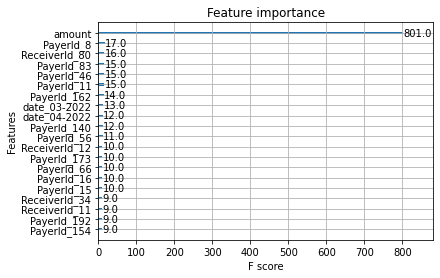

In [712]:
xgb.plot_importance(model, max_num_features=20, ax= plt.gca())

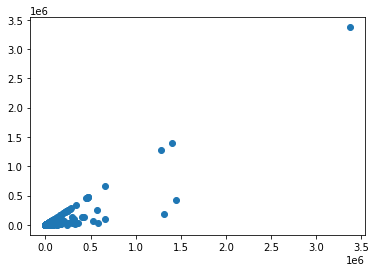

In [713]:
plt.scatter(data['amount'], data['amountfinancedByXepelin']) 
plt.show()

### Predicting new values

In [714]:
predictions = model.predict(X_test)

In [715]:
predictions[1:10]

array([-2.9351697e+00,  6.7473555e+00,  1.0000477e+03,  5.3664258e+04,
        7.0981650e+00,  6.7473555e+00,  7.8494940e+02,  6.7473555e+00,
        2.5491584e+03], dtype=float32)

In [716]:
X_test.iloc[1]

amount          1490.46
PayerId_1          0.00
PayerId_2          0.00
PayerId_3          0.00
PayerId_4          0.00
                 ...   
date_04-2022       0.00
date_05-2022       1.00
date_10-2021       0.00
date_11-2021       0.00
date_12-2021       0.00
Name: 683, Length: 290, dtype: float64

In [717]:
y_test.iloc[1]

0.0

### Model Error

In [718]:
### Training MSE

In [719]:
from sklearn.metrics import mean_squared_error, r2_score

In [720]:
pred_train = model.predict(X_train)

In [721]:
print(r2_score(y_train, pred_train))

0.9998933790269489


In [722]:
print(mean_squared_error(y_train, pred_train))

2104892.2749763243


In [723]:
### Testing MSE

In [724]:
model.score(X_test, y_test)

-2.7084882138170174

In [725]:
print(r2_score(y_test, predictions))

-2.7084882138170174


In [726]:
print(mean_squared_error(y_test, predictions))

3893046641.084932


### Conclusiones

## Serie temporal

In [778]:
datos = pd.read_csv('data_test.csv')

In [779]:
datos = datos.dropna(subset=['paidAt'])

In [780]:
datos.rename(columns = {'paidAt':'ds', 'amountfinancedByXepelin':'y'}, inplace = True)

In [781]:
df = datos.drop(columns=['PayerId', 'ReceiverId', 'invoiceId', 'status', 'amount'])

In [782]:
df = df.groupby(['ds'])['y'].sum().reset_index()

In [783]:
df['ds'] = pd.to_datetime(df['ds'])

In [784]:
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

In [785]:
df = df.set_index('ds')

In [786]:
period = 30

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

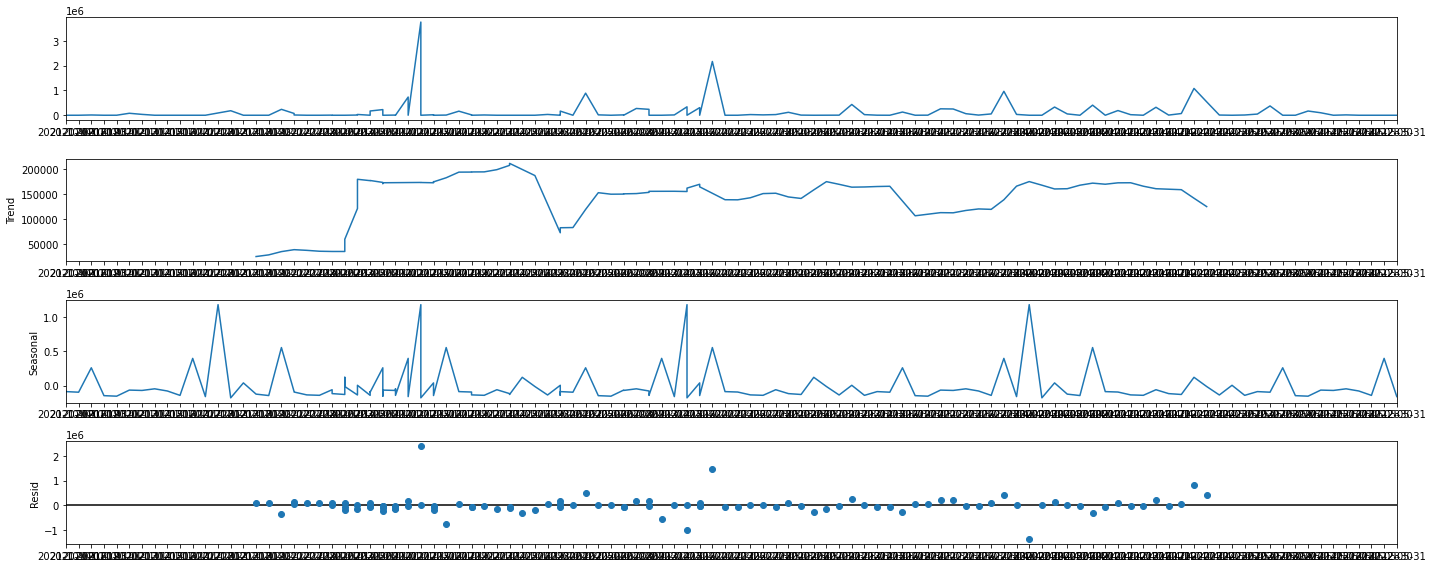

In [787]:
result = seasonal_decompose(df, model='additive', period=30)

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
result.plot();

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


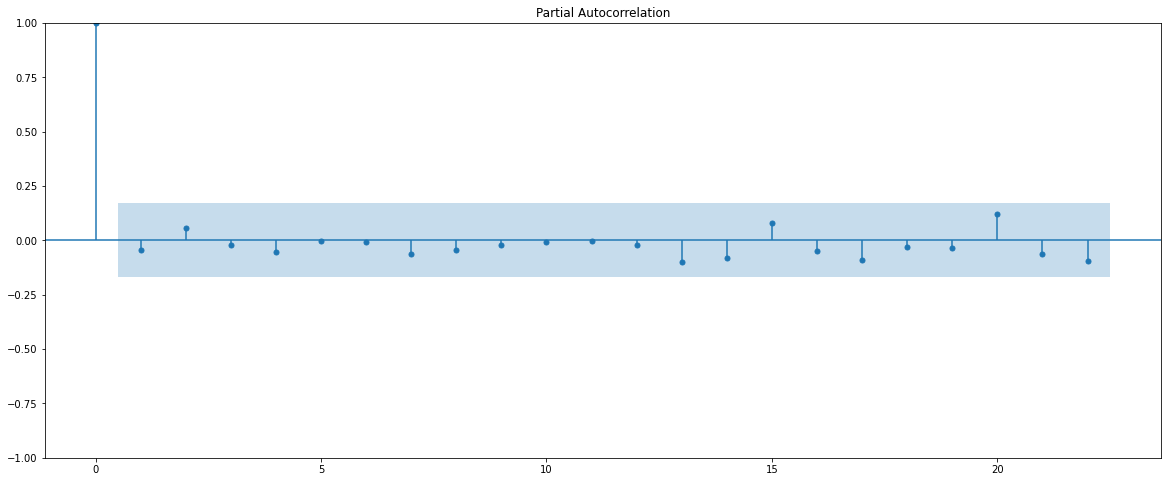

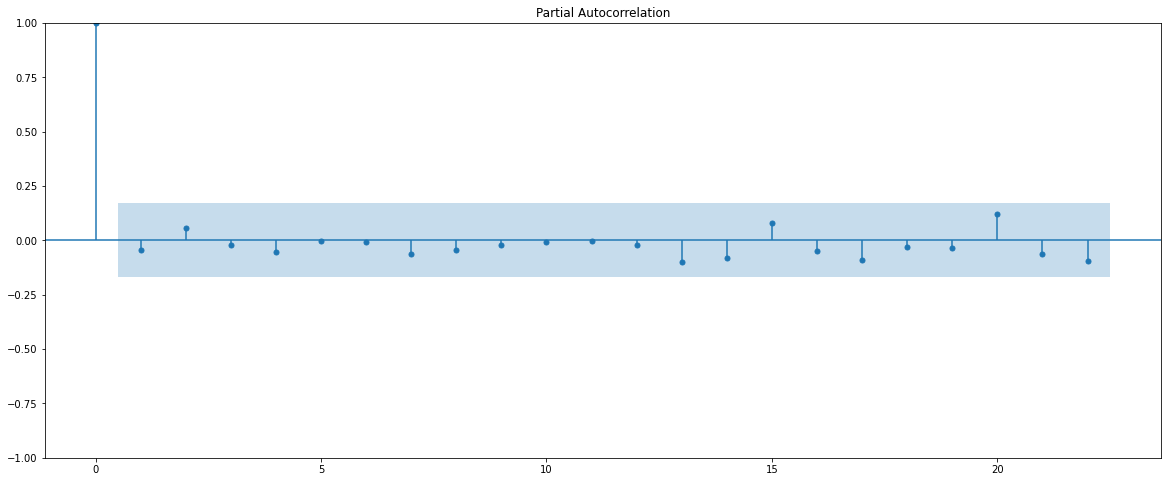

In [789]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)

In [790]:
from statsmodels.tsa.stattools import adfuller

In [791]:

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -11.89298083294517
ADF p-values: 5.809725134507589e-22
ADF number of lags used: 0
ADF number of observations: 131
ADF critical values: {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}
ADF best information criterion: 3399.6076031967154


<AxesSubplot:xlabel='ds'>

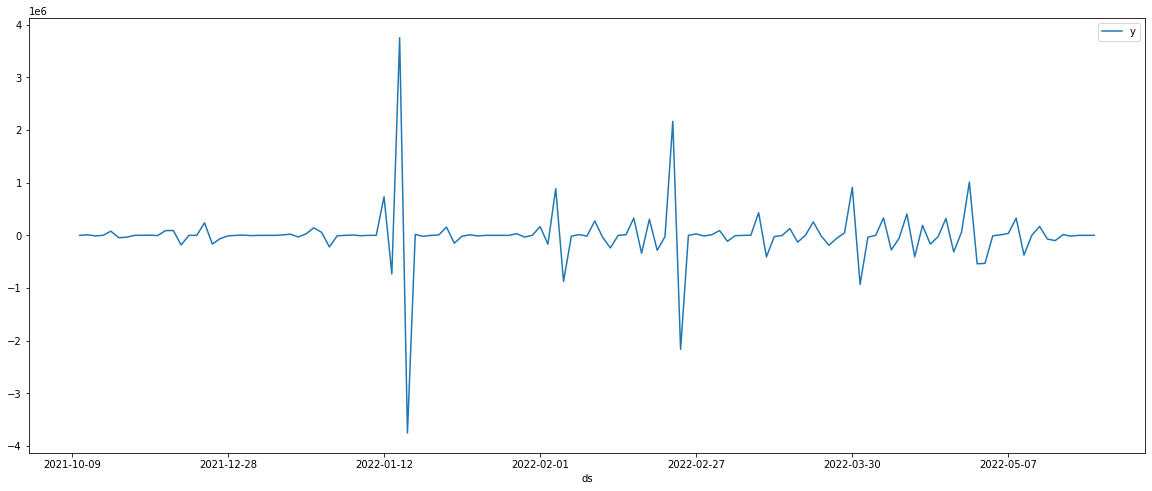

In [792]:
prev_value = df.shift()
differenced = df - prev_value
differenced.plot()

#### Prophet 

In [793]:
# funciona mejor con series con fuerte estacionalidad, pero es bueno con datos faltantes 

In [800]:
from multi_prophet import MultiProphet

In [801]:
df = pd.read_csv('data_test.csv')

In [802]:
df.shape

(1200, 7)

In [803]:
df.isnull().value_counts()

PayerId  ReceiverId  invoiceId  paidAt  amount  amountfinancedByXepelin  status
False    False       False      False   False   False                    False     892
                                True    False   False                    False     308
dtype: int64

In [804]:
df = df.dropna(subset=['paidAt'])

In [805]:
df.shape

(892, 7)

In [806]:
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20 00:00:00,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19 00:00:00,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13 00:00:00,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID


In [807]:
df = df.drop(columns=['PayerId', 'ReceiverId', 'invoiceId', 'status'])

In [808]:
df.rename(columns = {'paidAt':'ds', 'amount':'y1', 'amountfinancedByXepelin':'y'}, inplace = True)

In [809]:
df.head()

,ds,y1,y
0,2022-04-23 00:00:00,1490.46,0.00
1,2021-11-20 00:00:00,6418.28,624.48
2,2021-10-19 00:00:00,27979.20,10520.15
3,2021-11-13 00:00:00,183070.77,79421.63
4,2022-03-23 00:00:00,20532.00,20532.00


### Junio del 2022

In [810]:
m = MultiProphet(columns=["y", "y1"])
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [811]:
future_df = m.make_future_dataframe(periods=30, freq='d')
forecast = m.predict(future_df)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [812]:
forecast["y"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
917,2022-06-26,-2241.741892,-161055.955715,162850.993904
918,2022-06-27,-16869.054686,-187954.675804,154821.825083
919,2022-06-28,13755.554449,-151562.903915,188711.969368
920,2022-06-29,-894.592300,-147502.677840,171985.024892
921,2022-06-30,50467.444875,-116258.813816,224561.365839


In [813]:
forecast["y1"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
917,2022-06-26,-7630.946581,-200275.991004,193231.659155
918,2022-06-27,-23419.626747,-204923.974337,175136.128435
919,2022-06-28,12161.205772,-191296.762597,193645.588336
920,2022-06-29,103.823259,-197155.077654,213742.555143
921,2022-06-30,90759.440568,-113613.834941,267309.981954


In [814]:
financed = forecast["y"]

In [815]:
financed.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-09,4940.065415,-145298.177597,191640.465398,4940.065415,4940.065415,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,23896.599089
1,2021-10-09,4940.065415,-140043.258911,187882.399836,4940.065415,4940.065415,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,23896.599089
2,2021-10-16,6333.373578,-140198.773150,202352.983909,6333.373578,6333.373578,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,25289.907252
3,2021-10-19,6930.505648,-133394.460692,206797.717034,6930.505648,6930.505648,30078.530606,30078.530606,30078.530606,25018.504037,25018.504037,25018.504037,5060.026569,5060.026569,5060.026569,0.0,0.0,0.0,37009.036255
4,2021-10-31,9319.033928,-135574.532049,189360.632649,9319.033928,9319.033928,13788.902390,13788.902390,13788.902390,25018.504038,25018.504038,25018.504038,-11229.601647,-11229.601647,-11229.601647,0.0,0.0,0.0,23107.936318


In [816]:
amount = forecast["y1"]

In [817]:
amount

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-09,46970.901326,-139607.660228,250170.965737,46970.901326,46970.901326,2877.439535,2877.439535,2877.439535,7332.913160,7332.913160,7332.913160,-4455.473625,-4455.473625,-4455.473625,0.0,0.0,0.0,49848.340861
1,2021-10-09,46970.901326,-162643.974431,240797.596390,46970.901326,46970.901326,2877.439535,2877.439535,2877.439535,7332.913160,7332.913160,7332.913160,-4455.473625,-4455.473625,-4455.473625,0.0,0.0,0.0,49848.340861
2,2021-10-16,47140.065292,-157217.304943,237743.616929,47140.065292,47140.065292,2877.439536,2877.439536,2877.439536,7332.913161,7332.913161,7332.913161,-4455.473624,-4455.473624,-4455.473624,0.0,0.0,0.0,50017.504829
3,2021-10-19,47212.564135,-119394.351041,282908.741654,47212.564135,47212.564135,18419.216713,18419.216713,18419.216713,7332.913161,7332.913161,7332.913161,11086.303552,11086.303552,11086.303552,0.0,0.0,0.0,65631.780849
4,2021-10-31,47502.559507,-149478.507252,247066.244122,47502.559507,47502.559507,-2040.665633,-2040.665633,-2040.665633,7332.913161,7332.913161,7332.913161,-9373.578794,-9373.578794,-9373.578794,0.0,0.0,0.0,45461.893874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,2022-06-26,-5590.280948,-200275.991004,193231.659155,-6166.575509,-5053.583423,-2040.665633,-2040.665633,-2040.665633,7332.913161,7332.913161,7332.913161,-9373.578794,-9373.578794,-9373.578794,0.0,0.0,0.0,-7630.946581
918,2022-06-27,-5924.145945,-204923.974337,175136.128435,-6517.099798,-5354.281156,-17495.480801,-17495.480801,-17495.480801,7332.913160,7332.913160,7332.913160,-24828.393962,-24828.393962,-24828.393962,0.0,0.0,0.0,-23419.626747
919,2022-06-28,-6258.010942,-191296.762597,193645.588336,-6877.944711,-5658.341084,18419.216714,18419.216714,18419.216714,7332.913162,7332.913162,7332.913162,11086.303552,11086.303552,11086.303552,0.0,0.0,0.0,12161.205772
920,2022-06-29,-6591.875940,-197155.077654,213742.555143,-7244.504578,-5961.399053,6695.699199,6695.699199,6695.699199,7332.913159,7332.913159,7332.913159,-637.213961,-637.213961,-637.213961,0.0,0.0,0.0,103.823259


#### Ploteando resultados

In [818]:
from fbprophet.plot import add_changepoints_to_plot

In [819]:
import plotly.graph_objs as go

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'y': <Figure size 648x648 with 3 Axes>,
 'y1': <Figure size 648x648 with 3 Axes>}

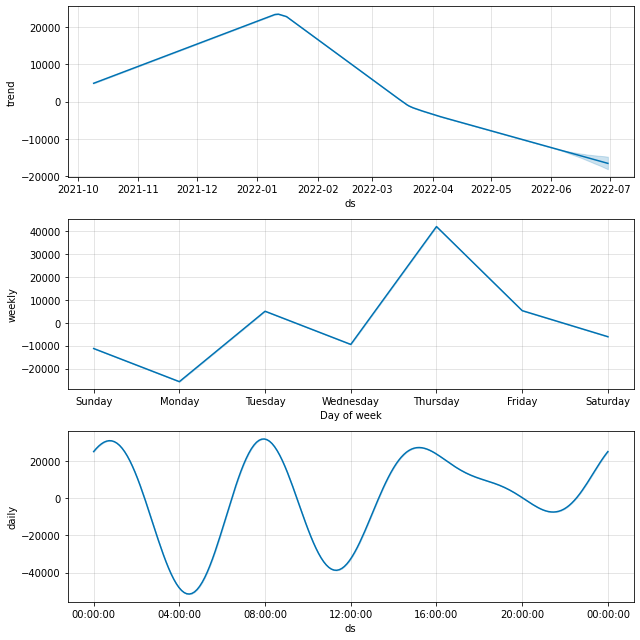

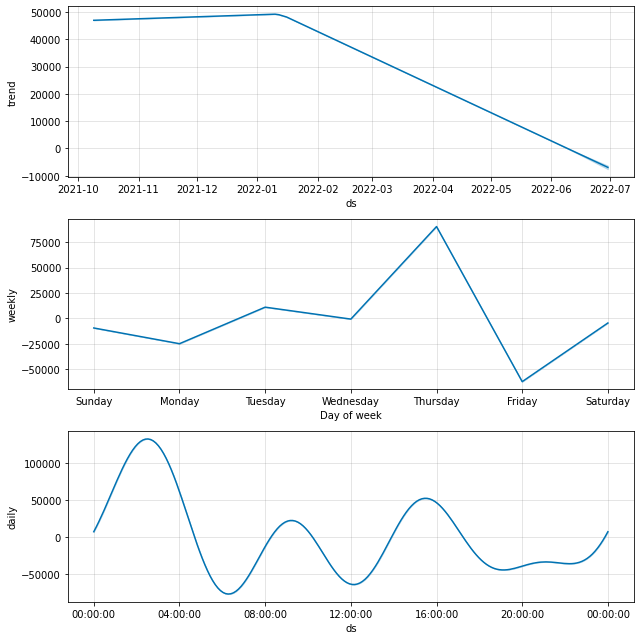

In [820]:
m.plot_components(forecast) 

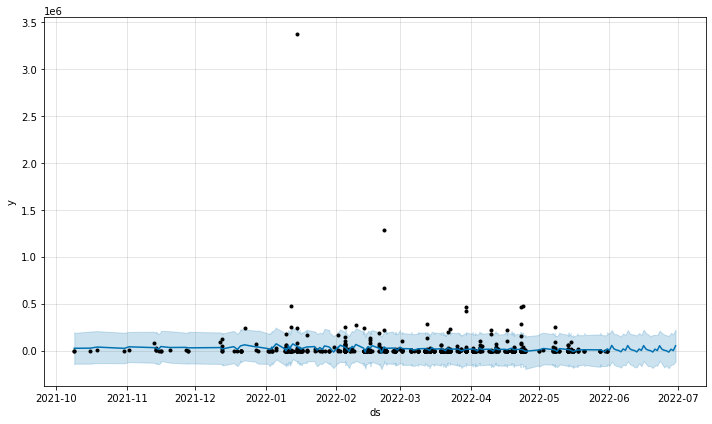

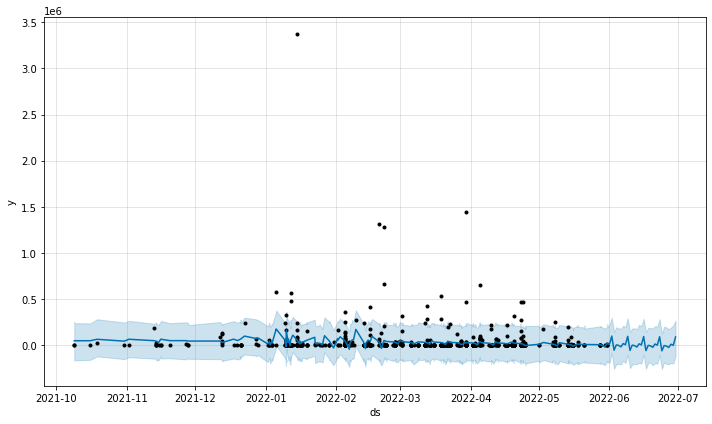

In [821]:
plot = m.plot(forecast)

## Resto del año 2022

In [822]:
future_df_2022 = m.make_future_dataframe(periods=210, freq='d')
forecast_2022 = m.predict(future_df_2022)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'y': <Figure size 648x648 with 3 Axes>,
 'y1': <Figure size 648x648 with 3 Axes>}

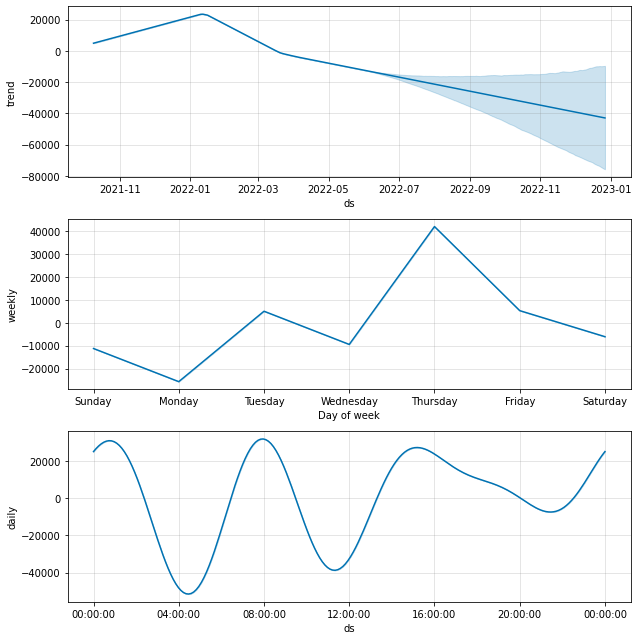

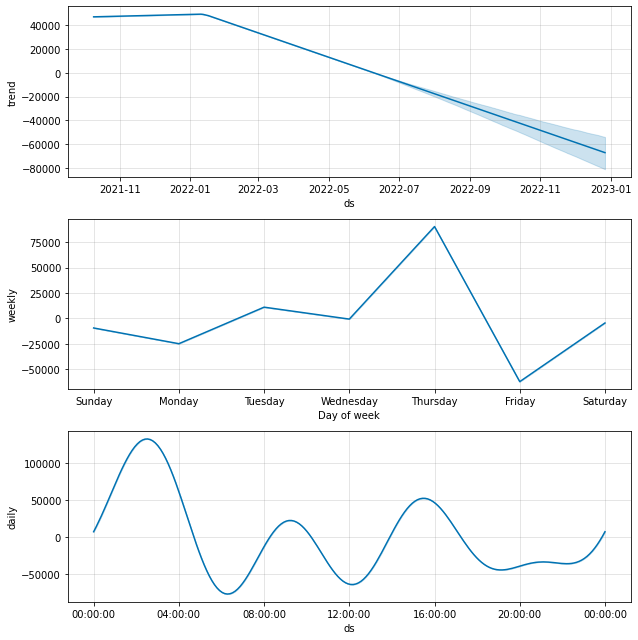

In [823]:
m.plot_components(forecast_2022) 

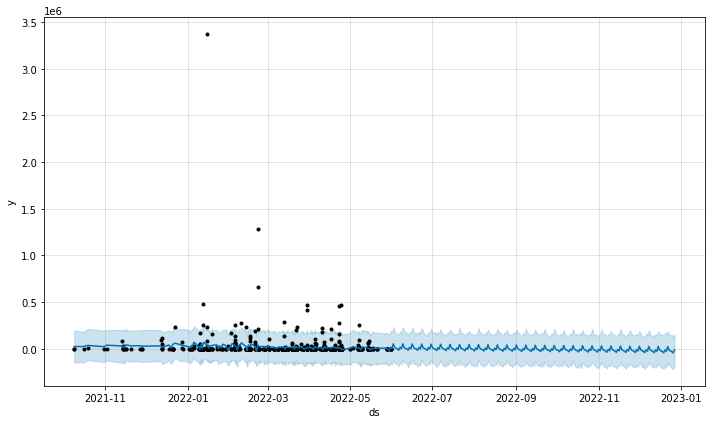

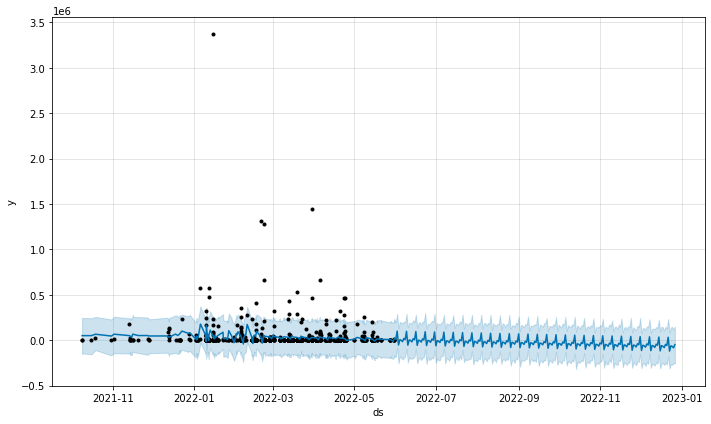

In [824]:
plot = m.plot(forecast_2022)